### Projeto Insight

O projeto será realizado para a empresa **fictícia** House Rocket, seu modelo de negócio é baseado na compra e venda de imóveis utilizando tecnologia. O CEO da House Rocket gostaria de maximizar o lucro da empresa encontando boas oportunidades de negócios.

<img src="img/projeto-insight/best-place.png" width="400" height="400"/>

O objetivo do projeto é identificar bons imóveis para compra, com boa localização e preço baixo para posteriormente revendê-los à preços mais altos. Ao decorrer do projeto iremos:  
* Identificar atributos importantes para serem considerados no momento da compra e reforma do imóvel, além do melhor período para realizar a venda;
* Identificar boas oportunidades de negócio;
* Identificar reformas que poderiam ser realizar para maximizar o lucro da empresa;
* Simular as reformas e prever o preço de venda do imóvel, obtendo o faturamento da empresa.

Para mais informações, acesse [Projeto Insight - Seja um Data Scientist](https://sejaumdatascientist.com/os-5-projetos-de-data-science-que-fara-o-recrutador-olhar-para-voce/).

### Dataset: [House Sales in King County - USA](https://www.kaggle.com/harlfoxem/housesalesprediction)   
O dataset que iremos trabalhar apresenta imóveis vendidos no período de 2014/05 - 2015/05 em King County (Condado de King). Primeiramente, vamos compreender o processo de divisão geopolítica dos USA e entender o que são os condados. O Estados Unidos da América é dividido em 50 estados, cada estado é subdivido em condados. Como exemplo, o estado americano de Washington é subdividido em 39 condados, entre eles, King County. 

In [4]:
from IPython.core.display import display, HTML
display(HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d690937.2663333984!2d-122.36379811452582!3d47.43195624174192!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x54905c8c832d7837%3A0xe280ab6b8b64e03e!2sKing+County%2C+WA%2C+USA!5e0!3m2!1sen!2sin!4v1534150510023" width="1000" height="400" frameborder="0" style="border:0" allowfullscreen></iframe>'))
import warnings
warnings.filterwarnings('ignore')

Vamos conhecer um pouco mais sobre essa região:  
* A maior cidade do condado é Seattle;
* O condado possuí uma área de 5975 km² e uma população de 1.931.249 habitantes;
* O condado possuí 742.237 residências, onde 710.916 estão ocupadas;
* A renda média anual de uma residência é de 53.157 dólares e a renda per capita do condado é de 29.521 dólares.  

**Obs**: Os dados são referente ao censo do ano 2000, para mais informações acesse este [link](https://pt.wikipedia.org/wiki/Condado_de_King_(Washington)).

### Importações

In [5]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

### Lendo dados

In [6]:
df_kingcounty = pd.read_csv('kc_house_data.csv')
df_kingcounty.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* **Atributos**

    * **id**: identificador do imóvel.
    * **date**: data da venda.
    * **price**: valor do imóvel.
    * **bedrooms**: quantidade de quartos.
    * **bathrooms**: quantidade de banheiros.
    * **sqft_living**: área interna do imóvel.
    * **sqft_lot**: tamanho do lote.
    * **floors**: quantidade de andares.
    * **waterfront**: valor binário representando se a residência está localizada a beira-mar ou não.
    * **view**: valor de 0-4 indicando a qualidade da vista. 
    * **condition**: valor de 1-5 indicando a condição do imóvel.  
    * **grade**: valor de 1-13 indicando a qualidade de construção e acabamento do imóvel.
    * **sqft_basement**: área do porão. 
    * **sqft_above**: área superior ao porão (sqft_living - sqft_basement).
    * **yr_built**: ano de construção.
    * **yr_renovated**: ano de reforma.
    * **zipcode**: código postal.  
    * **lat**: latitude.
    * **long**: longitude.
    * **sqft_living15**: sqft_living médio das 15 casas mais próximas. 
    * **sqft_lot15**: sqft_lot médio das 15 casas mais próximas. 
    
Referência: [Home Sales in King County](https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/)

In [7]:
#Dimensão
df_kingcounty.shape

(21613, 21)

In [8]:
#Tipos dos atributos
df_kingcounty.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df_kingcounty.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Limpeza de Dados

In [10]:
#Verificando valores nulos
df_kingcounty.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* ***Date***

In [11]:
df_kingcounty['date'].sample(5)

6734     20141022T000000
8014     20150204T000000
9950     20140917T000000
17545    20140723T000000
7432     20140922T000000
Name: date, dtype: object

O atributo date é do tipo object, iremos tratá-lo e realizar a conversão para o tipo datetime.

In [12]:
df_kingcounty['date'] = df_kingcounty['date'].str.replace(r'(201[4|5])(0[1-9]|1[0-2])([0-2][0-9]|3[0-1])T000000', 
                                                          r'\1-\2-\3')
df_kingcounty['date'] = pd.to_datetime(df_kingcounty['date'])
df_kingcounty['year_sale'] = df_kingcounty['date'].dt.year
df_kingcounty['month_sale'] = df_kingcounty['date'].dt.month

* ***Bedrooms (Quartos)***

In [13]:
df_kingcounty['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df_kingcounty['bedrooms'].mean()

3.37084162309721

Temos algo curioso, uma residência contendo 33 quartos, valor muito distante da média de 3.37 quartos por residência. Uma residência com essa enorme quantidade de quartos apresentaria área interna acima da média, vamos verificar:

In [15]:
df_kingcounty['sqft_living'].mean()

2079.8997362698374

In [16]:
df_kingcounty.query('bedrooms == 33')['sqft_living']

15870    1620
Name: sqft_living, dtype: int64

Dessa forma, irei optar por remover tal registro por considerá-lo um **outlier** e evitar sua influência em avaliações futuras:

In [17]:
df_kingcounty.drop(df_kingcounty.query('bedrooms == 33').index, inplace=True)

Outra situação curiosa são 13 imóveis com zero quartos, vamos análisa-los:

In [18]:
df_kingcounty.query('bedrooms == 0' )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,0,1990,0,98102,47.6362,-122.322,2360,4000,2014,6
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,0,2006,0,98133,47.7145,-122.356,1470,1399,2015,2
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,0,1999,0,98125,47.7222,-122.290,1430,1650,2014,8
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,0,1953,0,98118,47.5260,-122.261,2170,6000,2014,10
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,0,1990,0,98053,47.6642,-122.069,4740,35061,2014,6
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,0,1985,0,98042,47.3473,-122.151,2500,8751,2014,11
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,0,2003,0,98038,47.3493,-122.053,1810,5685,2014,9
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,0,1990,0,98031,47.4095,-122.168,2520,8050,2015,4
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,0,1996,0,98065,47.5265,-121.828,1060,7200,2014,12
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,0,1999,0,98065,47.5261,-121.826,1500,4675,2015,2


Todos possuem área interna, não sou capaz de garantir que se tratam de imóveis residenciais. Como meu objetivo é o lucro a partir da compra e reforma de imóveis residenciais, irei removê-los do conjunto.

In [19]:
df_kingcounty.drop(df_kingcounty.query('bedrooms == 0').index, inplace=True)

* ***Bathrooms (Banheiros)***

In [20]:
df_kingcounty['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
0.00       3
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Da mesma forma como ocorreu na análise dos quartos, temos imóveis sem banheiros. Irei adotar a mesma estratégia e removê-los do conjunto.

In [21]:
df_kingcounty.drop(df_kingcounty.query('bathrooms == 0').index, inplace=True)

* ***Bedroom/Bathroom (Relação entre quartos e banheiros)***  
Irei adicionar tal atributo para verificar posteriormente sua influência no valor do imóvel.

In [22]:
df_kingcounty['bed_bath'] = df_kingcounty['bedrooms'] / df_kingcounty['bathrooms']

## Análise exploratória  

### Preço _(price)_

* ***Onde os imóveis estão localizados?***

In [52]:
fig = px.scatter_mapbox(df_kingcounty, lat="lat", lon="long", color='price', size='price',
                        color_continuous_scale=px.colors.sequential.RdBu, zoom=7, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

* ***Qual o valor da maioria dos imóveis?***

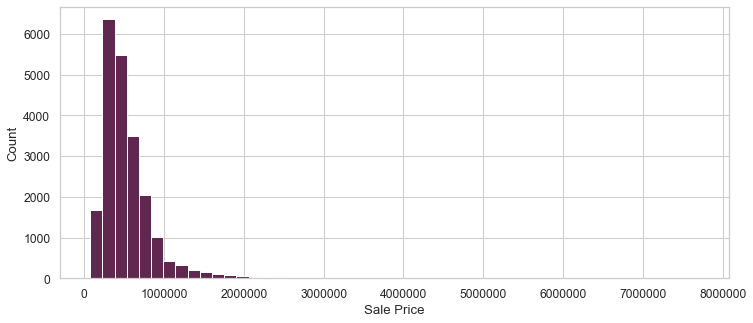

In [32]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [12, 5]})
sns.distplot(df_kingcounty['price'], norm_hist=False, kde=False, 
             bins=50, hist_kws={'alpha': 1}, color='#602851').set(xlabel='Sale Price', ylabel='Count');

A maioria dos imóveis custam abaixo de 1 milhão de dólares. Havendo uma concentração entre 300 e 500 mil dólares.

* ***Quais meses houve a maior quantidade de vendas?***  
Os dados fornecidos são de maio de 2014 a maio de 2015.

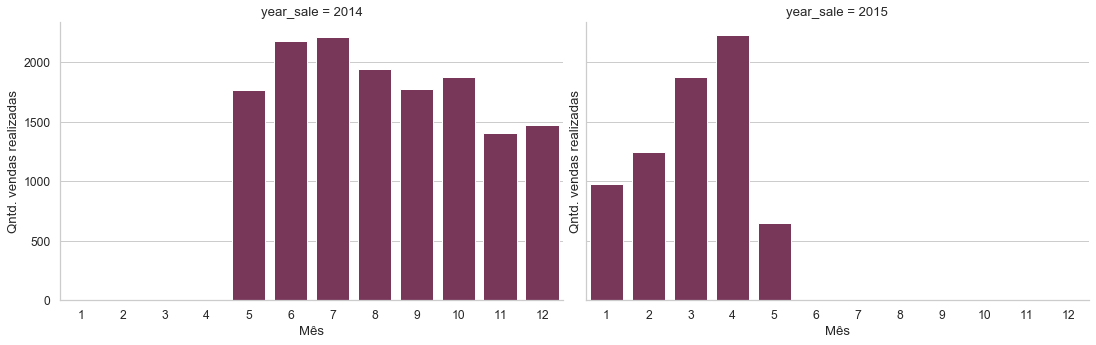

In [33]:
vendas = sns.catplot(
    data=df_kingcounty[df_kingcounty['year_sale'].isin([2014, 2015])],
    x='month_sale',
    kind='count',
    col='year_sale',
    color='#832b5a',
    aspect=1,
).set(xlabel='Mês', ylabel='Qntd. vendas realizadas');
plt.subplots_adjust(right=1.5)

A maioria das vendas foram realizadas nos meses de junho e setembro de 2014 e abril de 2015. Além disso, podemos identificar uma queda nas vendas no fim e início de cada ano, mostrando não ser uma época propícia para colocamos os imóveis a venda. 

### Área interna _(sqftliving)_

* ***Qual a relação entre o tamanho da área de convivência e valor do imóvel?***

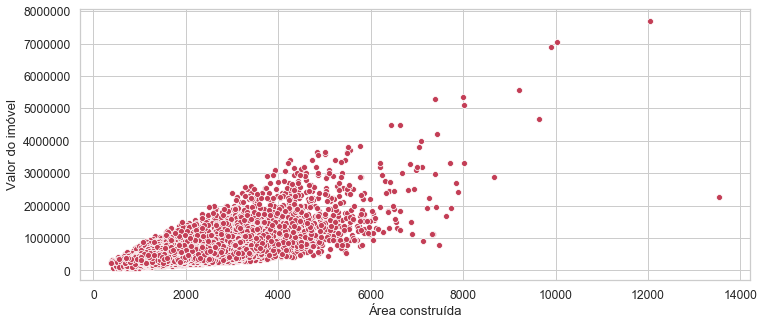

In [34]:
sns.scatterplot(x=df_kingcounty['sqft_living'], y=df_kingcounty['price'], color='#c33e56').set(xlabel='Área construída', ylabel='Valor do imóvel');

O tamanho da área de convivência está diretamente correlacionada com o valor do imóvel, quanto maior a área de convivência, maior o valor do imóvel.

### Beira-mar _(waterfront)_

* ***Imóveis localizados à beira-mar valem mais?***

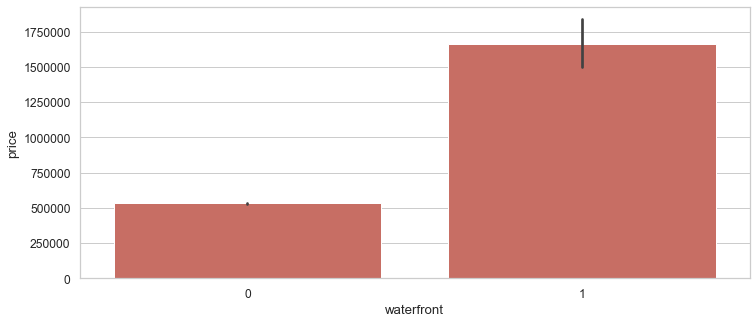

In [35]:
sns.barplot(x='waterfront', y='price', data=df_kingcounty, color='#d76154');

Imóveis com vista para o mar são mais valorizados em comparação com imóveis que não possuem tal atributo. 

### Qualidade de construção _(grade)_   
O atributo _grade_ se refere a qualidade de construção e acabamento do imóvel, variando de 1 a 13, sendo:   
* **1-3**: Construções com padrões mínimos de construção. Normalmente trata-se de cabines ou estruturas inferiores.
* **4**: Construções antigas e de baixa qualidade.
* **5**: Construções simples, pequenas e de baixo custo.
* **6**: Construções com material de baixa qualidade e design simples.
* **7**: Média qualidade de construção e design.
* **8**: Qualidade de construção e design acima da média.
* **9**: Construções com melhor arquitetura, design interno e externo de qualidade.
* **10-13**: Imóveis de alto padrão com alto nível de acabamento e design, possuem maior quantidade de andares e área interna.

* ***Qual o acabamento da maioria dos imóveis?***

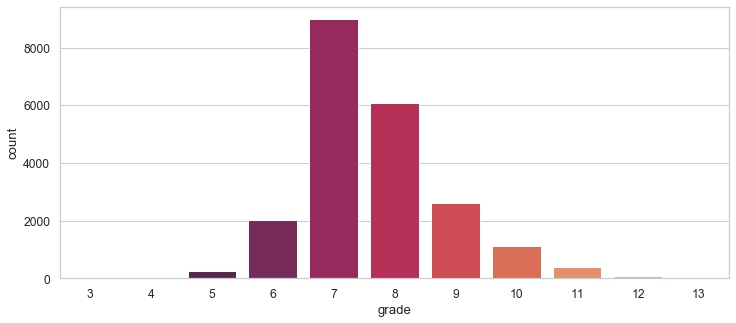

In [28]:
grade = sns.countplot(df_kingcounty['grade'], palette="rocket");

A maioria dos imóveis apresentam um nível médio de construção e design.

* ***Qual a relação entre acabamento e valor do imóvel?***

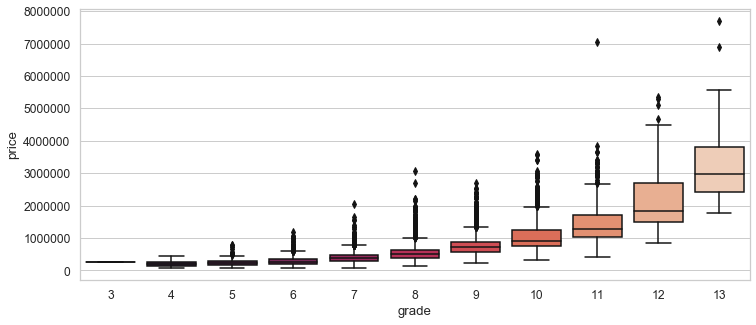

In [30]:
sns.boxplot('grade', 'price', data=df_kingcounty, palette="rocket");

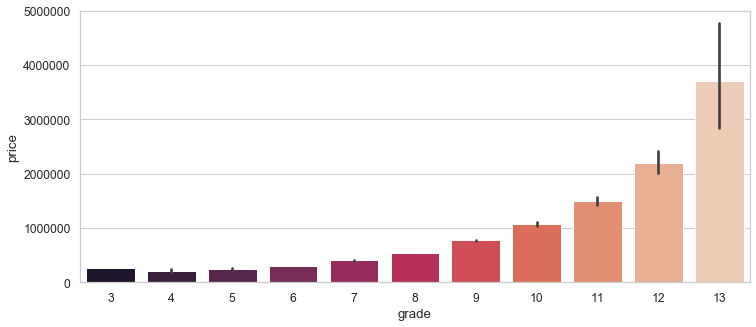

In [54]:
sns.barplot(x='grade', y='price', data=df_kingcounty, palette="rocket");

Imóveis com maiores níveis de acabamento, construção e design são altamente valorizados. Atributo importante a ser considerado no momento da reforma, porém deve ser considerado que qualquer reforma a ser realizada deve manter o padrão adotado em todo o imóvel, ou seja, quanto maior o nível, maior será o custo da reforma. 

Vamos identificar a diferença entre as medianas para os maiores níveis de acabamento.  
**Obs:** Optei por utilizar a mediana para evitar a influência de imóveis muito valiosos (**outliers**).

A diferença entre a mediana dos imóveis com acabamento 8 e 9 é de U$ 210.000,00.

In [74]:
df_kingcounty[df_kingcounty['grade'] == 9]['price'].median() - df_kingcounty[df_kingcounty['grade'] == 8]['price'].median()

210000.0

A diferença entre a mediana dos imóveis com acabamento 9 e 10 é de U$ 194.327,00.

In [75]:
df_kingcounty[df_kingcounty['grade'] == 10]['price'].median() - df_kingcounty[df_kingcounty['grade'] == 9]['price'].median()

194327.0

A diferença entre a mediana dos imóveis com acabemento 11 e 10 é de U$ 369.673,00.

In [76]:
df_kingcounty[df_kingcounty['grade'] == 11]['price'].median() - df_kingcounty[df_kingcounty['grade'] == 10]['price'].median()

369673.0

A diferença entre a mediana dos imóveis com acabemento 12 e 11 é de U$ 536.000,00.

In [77]:
df_kingcounty[df_kingcounty['grade'] == 12]['price'].median() - df_kingcounty[df_kingcounty['grade'] == 11]['price'].median()

536000.0

A diferença entre a mediana dos imóveis com acabemento 13 e 12 é de U$ 1.163.000,00.

In [78]:
df_kingcounty[df_kingcounty['grade'] == 13]['price'].median() - df_kingcounty[df_kingcounty['grade'] == 12]['price'].median()

1163000.0

No momento da compra irei considerar imóveis com nível 8 e 9, por possuírem qualidade de construção e acabamento acima da média, além de menor custo em comparação com níveis mais elevados.

### Banheiros _(bathrooms)_  

A quantidade de banheiros é definido da seguinte forma:  
* Um banheiro completo **(valor inteiro)** contém **banheira, chuveiro, pia e vaso sanitário**;
* O valor decimal **0.75** representa banheiros que contém **chuveiro, pia e vaso sanitário**;
* Um lavabo é representado por **0.5** contendo uma **pia e um vaso sanitário**;
* E o valor decimal **0.25** são pequenos cômodos que contém apenas **chuveiro ou vaso sanitário**. 
    
    
Referência: [St. Paul Real State](https://www.stpaulrealestateblog.com/2011/01/the-one-quarter-bath.html)

* ***Como os valores estão distribuídos?***

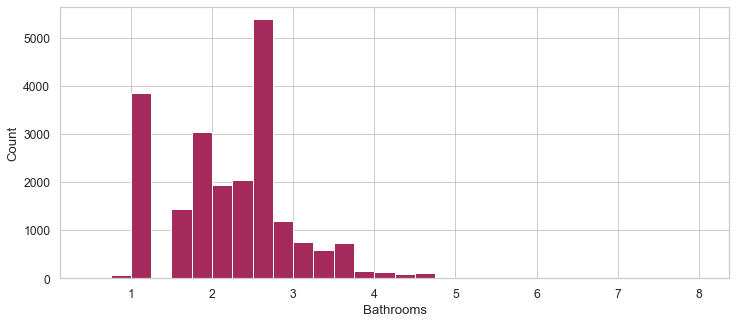

In [48]:
sns.distplot(df_kingcounty['bathrooms'], norm_hist=False, kde=False, color='#a42a5b', 
             bins=30, hist_kws={'alpha': 1}).set(xlabel='Bathrooms', ylabel='Count');

A maioria dos imóveis possuem 1 banheiro completo ou 2 banheiros completos e 1 lavabo.

### Quartos _(bedrooms)_  

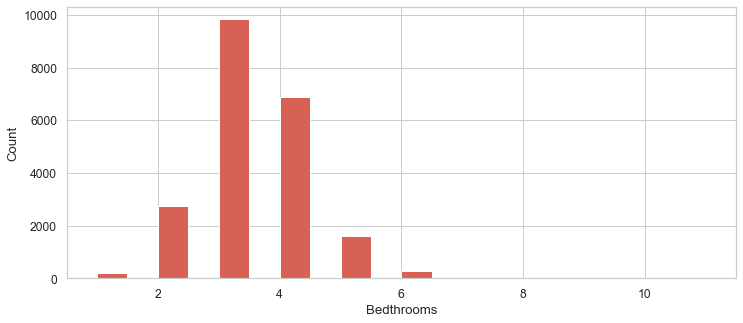

In [41]:
sns.distplot(df_kingcounty['bedrooms'], norm_hist=False, kde=False, color='#d76154', 
             bins=20, hist_kws={'alpha': 1}).set(xlabel='Bedthrooms', ylabel='Count');

A maioria das residências possuem 3 e 4 quartos.

### Relação entre quartos e banheiros _(bedrooms/bathrooms)_  

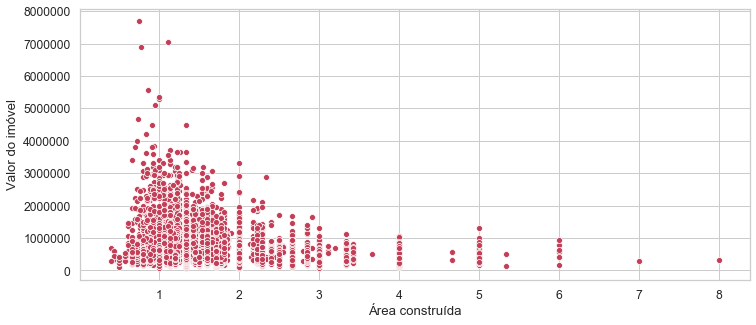

In [50]:
sns.scatterplot(x=df_kingcounty['bed_bath'], y=df_kingcounty['price'], color='#c33e56').set(xlabel='Área construída', ylabel='Valor do imóvel');

Para valores em que a proporção é menor que 1 significa que a residência possuí mais banheiros do que quartos. Para valores em que a proporção é superior a 1, temos mais quartos do que banheiros, havendo necessidade dos banheiros serem compartilhados. Ambas situações desvalorizam os imóveis.  

### Quais casas o CEO da House Rocket deveria comprar?   

<img src="img/projeto-insight/deal.png" width="500" height="500"/>

Através das análises realizadas anteriormente, foi possível observar uma valorização de imóveis localizados na costa, com vista para o mar. Considero waterfront um atributo importante em minha estratégia de compra, pelo fato de ser um atributo que não pode ser obtido através de uma reforma. Além disso, constatamos uma alta valorização dos imóveis com maior nível de acabamento. A compra irá se basear em imóveis localizados a beira-mar com qualidade de acabamento 8 e 9 que estejam custando abaixo da mediana de sua categoria.

In [82]:
options = df_kingcounty[df_kingcounty['waterfront'] == 1].query('grade == 8 or grade == 9')

In [83]:
options = options[options['price'] < options['price'].median()]

Irei optar por imóveis com as melhores vista.

In [84]:
options.drop(options.query('view == 3').index, inplace=True)
options

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale,bed_bath
1417,7663700030,2015-05-03,1175000.0,2,2.50,1770,7155,2.0,1,4,...,1957,2004,98155,47.7345,-122.285,2410,10476,2015,5,0.800000
1662,1925069121,2015-03-30,960000.0,3,2.50,1730,4102,3.0,1,4,...,1996,0,98074,47.6450,-122.084,2340,16994,2015,3,1.200000
3252,3343301910,2014-10-20,1000000.0,5,4.50,2120,8944,2.0,1,4,...,1939,1963,98006,47.5488,-122.197,2870,8944,2014,10,1.111111
4295,7781600025,2014-10-23,1155000.0,3,2.50,2490,24691,1.0,1,4,...,1961,0,98146,47.4880,-122.364,2800,24121,2014,10,1.200000
5760,623059016,2014-07-17,1100000.0,4,3.25,3190,11774,2.0,1,4,...,1956,1991,98178,47.5033,-122.225,2240,8725,2014,7,1.230769
8156,1121039059,2014-05-22,503000.0,2,1.75,2860,59612,1.0,1,4,...,1948,2003,98023,47.3276,-122.389,2720,59612,2014,5,1.142857
8224,7129303045,2015-04-17,949950.0,5,2.50,2340,1989,2.0,1,4,...,1959,0,98118,47.5193,-122.257,2200,3230,2015,4,2.000000
9085,3222049055,2015-01-16,650000.0,3,1.75,2800,19386,1.0,1,4,...,1965,0,98198,47.3554,-122.324,3270,31450,2015,1,1.714286
9252,7352200025,2014-10-13,1190000.0,2,1.75,2080,8112,1.0,1,4,...,1939,1984,98125,47.7134,-122.277,2030,8408,2014,10,1.142857
9856,121039083,2015-02-06,629000.0,3,1.75,1460,12367,2.0,1,4,...,1970,0,98023,47.3311,-122.375,1970,18893,2015,2,1.714286


Considerando que quanto mais antigo for o imóvel, mais imprevistos poderão ocorrer durante a reforma. Irei remover imóveis construídos anterior a 1950 que não foram reformados.

In [85]:
acquisitions = options.drop(options.query('yr_built < 1980 & yr_renovated < 1980').index)
len(acquisitions)

10

In [86]:
acquisitions['price'].sum()

9160500.0

Chegamos ao final com a aquisição de 10 imóveis, com o investimento total de U$ 9.160.500,00.

In [87]:
acquisitions['house'] = list(range(1, 11))
acquisitions = acquisitions.set_index(acquisitions['house'])

### Quais reformas devem ser realizadas?  
<img src="img/projeto-insight/reform.png" width="500" height="500"/>

Como analisamos anteriormente, imóveis mais valorizados possuem a relação entre quartos e banheiros próxima a 1, portanto iremos buscar atingir essa proporção em nossas reformas. Além disso, melhorar o nível do acabamento valoriza significativamente o imóvel. Dessa forma, as reformas serão realizadas nos atributos _bedrooms, bathrooms_ e _grade_.

In [88]:
reforms = ['bedrooms', 'bathrooms', 'grade']
acquisitions[reforms]

,bedrooms,bathrooms,grade
house,,,
1,2,2.50,8
2,3,2.50,8
3,4,3.25,8
4,2,1.75,8
5,2,1.75,8
6,3,2.50,8
7,3,2.00,8
8,2,1.75,8
9,3,2.50,9


### Reformas:  

  * **Imóvel 1**: adicionar 1 quarto e aumentar o nível de acabamento para 10.
  * **Imóvel 2**: aumentar o nível de acabamento para 10.
  * **Imóvel 3**: adicionar 1 lavabo e aumentar o nível de acabamento para 10.
  * **Imóvel 4**: adicionar 1 quarto, 1 banheiro completo e aumentar o nível de acabamento para 10.
  * **Imóvel 5**: adicionar 1 quarto, 1 banheiro completo e aumentar o nível de acabamento para 10.
  * **Imóvel 6**: aumentar o nível de acabamento para 10.
  * **Imóvel 7**: adicionar 1 banheiro completo e aumentar o nível de acabamento para 10.
  * **Imóvel 8**: adicionar 1 quarto, 1 banheiro completo e aumentar o nível de acabamento para 10.
  * **Imóvel 9**: aumentar o nível de acabamento para 11.
  * **Imóvel 10**: aumentar o nível de acabamento para 11.

### Tamanho padrão:  
  * **Lavabo**: 2x2 = 4m² = 43 ft²;
  * **Banheiro completo**: 4x2 = 8m² = 86 ft²;
  * **Quarto**: 6x5 = 30m² = 323 ft²;

### Qual será o valor de venda dos imóveis?

Para a tarefa de previsão será desenvolvido um WebApp para simular as reformas e em seguida, prever o valor de venda. Para prever o valor de venda do imóvel, iremos implementar um modelo de regressão.
<img src="img/projeto-insight/ia.png" width="500" height="500"/>

### Seleção de atributos
 A tarefa de **feature selection** será realizada de duas diferentes formas: analisando a correlação entre as variáveis e utilizando um modelo linear para obter as variáveis mais importantes.

* **Correlação**

Quais atributos apresentam maior correlação com o valor do imóvel?

In [89]:
correlation = df_kingcounty.corr()
correlation['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701921
grade            0.667935
sqft_above       0.605395
sqft_living15    0.585273
bathrooms        0.525915
view             0.397323
sqft_basement    0.323772
bedrooms         0.315966
lat              0.306772
waterfront       0.266438
floors           0.256831
yr_renovated     0.126418
sqft_lot         0.089885
sqft_lot15       0.082841
yr_built         0.053995
condition        0.036000
long             0.022103
year_sale        0.003757
month_sale      -0.009954
id              -0.016727
zipcode         -0.053443
bed_bath        -0.254221
Name: price, dtype: float64

Selecionando os atributos mais correlacionados:

In [90]:
most_correlated = correlation[correlation['price'].sort_values(ascending=False) > 0.2].index

Treinando o modelo:

In [91]:
X = df_kingcounty[most_correlated].drop(['price'], axis=1)
y = df_kingcounty['price']

Algoritmos de aprendizado de máquina não funcionam tão bem quando os atributos apresentam escalas muito diferentes. Neste caso, temos atributos categóricos binários (_waterfront_) e atributos com muitas casas decimais, como _price_. Portanto, precisamos padronizar nossos dados. Para isso, basta adicionar **normalize=True** na chamada do modelo de regressão linear.

In [92]:
def train_model(features, target, model): 
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return dict(zip(features.columns, model.coef_)), mean_absolute_error(y_pred, y_test)

In [93]:
coef, mae = train_model(X, y, LinearRegression(normalize=True))

In [94]:
coef

{'bedrooms': -24792.00527529608,
 'bathrooms': 569.0839477160894,
 'sqft_living': 660014250265181.2,
 'floors': -26123.101090012537,
 'waterfront': 621028.040358069,
 'view': 64737.529027209814,
 'grade': 85902.59154507634,
 'sqft_above': -660014250265001.9,
 'sqft_basement': -660014250264986.5,
 'lat': 661649.1723405311,
 'sqft_living15': 10.859127187348383}

Analisando os coeficientes, podemos observar que o atributo bedrooms possuí valor negativo, ou seja, desvaloriza o imóvel. Esse resultado pode ser decorrente da presença de **multicolinearidade**. A multicolinearidade ocorre dentre algumas situações, entre elas quando duas variáveis são altamente correlacionadas. Um modelo de regressão não terá uma solução bem definida na presença de multicolinearidade. Vamos análisar as correlação entre as variáveis selecionadas:

In [95]:
matrix = np.triu(df_kingcounty[most_correlated].corr())

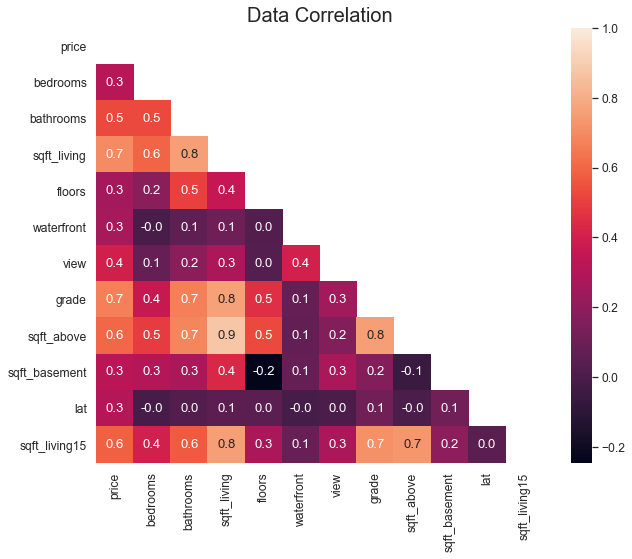

In [96]:
plt.subplots(figsize=(10,8))
sns.heatmap(df_kingcounty[most_correlated].corr(),annot=True, mask = matrix,fmt="1.1f")
plt.title("Data Correlation",fontsize=20)
plt.show()

Como podemos observar, há uma alta relação entre sqft_living e sqft_above. Lembrando que sqft_living é resultado de sqft_above + sqft_basemente, ou seja, seu valor é redundante, pois já está sendo representada por duas outras variáveis. Portanto, iremos removê-lá e analisar os coeficientes.

In [97]:
X2 = df_kingcounty[most_correlated].drop(['price', 'sqft_living'], axis=1)

In [98]:
coef_without_living, mae_without_living = train_model(X2, y, LinearRegression(normalize=True)) 
coef_without_living

{'bedrooms': -25706.738344331192,
 'bathrooms': 764.9197017428048,
 'floors': -27255.533431036045,
 'waterfront': 622365.0114551858,
 'view': 64654.677964724826,
 'grade': 85830.47676665893,
 'sqft_above': 179.56936360310294,
 'sqft_basement': 194.5824618299124,
 'lat': 662138.7382543394,
 'sqft_living15': 11.254453922644387}

O coeficiente bedroom permanece negativo, descobri que se trata de uma situação comum no ramo imobiliário. Residências com área e quantidade de banheiros similares, ter mais quartos, está associado a casas menos valiosas, pois se trata de quartos menores. 

In [99]:
print('Mean absolute error: {}'.format(mae))

Mean absolute error: 132759.54340627886


Utilizamos um modelo simples como base para analisar os coeficientes e obter o mean absolute error. Vamos implementar um modelo utilizando Random Forest Regressor e verificar se obtemos melhor resultado:

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [101]:
model_rf = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [102]:
y_pred_rf = model_rf.predict(X_test)
print('Random Forest - Mean absolute error: {}'.format(mean_absolute_error(y_pred_rf, y_test)))

Random Forest - Mean absolute error: 86378.02139567144


A seguir, vamos realizar a seleção de atributos utilizando um modelo linear e verificar se batemos o mean absolute erro anterior.

* **Selector**

In [125]:
from sklearn.feature_selection import SelectFromModel

In [104]:
X_select = df_kingcounty.drop(['price', 'date'], axis=1)
y_select = df_kingcounty['price']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_select, y_select, test_size=0.33, random_state=42)

A seguir, será utilizado um modelo de Regressão Linear para selecionar os atributos mais importantes e Random Forest Regressor para treinamento do modelo:

In [106]:
features = {}

for k in range(1, X_train.shape[1]):
    selector_model = LinearRegression(normalize=True)
    selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)
    
    selector.fit_transform(X_train, y_train)
    X_train2 = selector.transform(X_train)
    X_test2 = selector.transform(X_test)
    
    model = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
    model.fit(X_train2, y_train)
    pred = model.predict(X_test2)
    
    mask = selector.get_support()
    features[k] = X_train.columns[mask]
    
    score_mae = mean_absolute_error(y_test, pred)
    print('K = {} - MAE = {}'.format(k, score_mae))

K = 1 - MAE = 228913.19422788033
K = 2 - MAE = 198774.48696689276
K = 3 - MAE = 123414.21908981328
K = 4 - MAE = 103454.23997567488
K = 5 - MAE = 101699.99409479043
K = 6 - MAE = 84752.00500519265
K = 7 - MAE = 85061.97557252656
K = 8 - MAE = 82580.93603195428
K = 9 - MAE = 82120.16248250783
K = 10 - MAE = 81084.00877276888
K = 11 - MAE = 80719.87156645085
K = 12 - MAE = 79305.66735348475
K = 13 - MAE = 79510.91243943221
K = 14 - MAE = 79190.50519087375
K = 15 - MAE = 70227.04021920664
K = 16 - MAE = 69981.83590070624
K = 17 - MAE = 70065.31301877835
K = 18 - MAE = 69913.30671736588
K = 19 - MAE = 69994.71240262382
K = 20 - MAE = 69217.17978504278
K = 21 - MAE = 68889.98218869558


Realizando a seleção de atributos com o método selector from model obtemos um resultado superior ao teste de correlação utilizando 6 atributos. Vamos verificar quais foram as 15 features mais importantes selecionados pelo modelo:

In [116]:
features[15]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'year_sale',
       'month_sale', 'bed_bath'],
      dtype='object')

In [114]:
X_selected = df_kingcounty[features[15]]
y_selected = df_kingcounty['price']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.33, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Exportando modelo para ser utilizado no WebApp:

In [110]:
joblib.dump(model, "modelo_rf.pkl")

['modelo_rf.pkl']

### Qual será o faturamento previsto da empresa?   

Para simular o valor dos imóveis após as reformas realizadas foi desenvolvido um WebApp utilizando o framework [Streamlit](https://www.streamlit.io/). A aplicação está disponível neste [link](https://streamlit-app-previsao.herokuapp.com/).

<img src="img/projeto-insight/app.gif" width="500" height="500"/>

De acordo com as simulações realizadas, os imóveis serão vendidos pelos seguintes valores:  
    
  * **Imóvel 1**: U\\$ 1.262.779, valorização de U\$ 87.779.
  * **Imóvel 2**: U\\$ 1.620.456, valorização de U\$ 660.456.
  * **Imóvel 3**: U\\$ 1.489.747, valorização de U\$ 389.747.
  * **Imóvel 4**: U\\$ 1.246.400, valorização de U\$ 743.400.
  * **Imóvel 5**: U\\$ 1.328.840, valorização de U\$ 138.840.
  * **Imóvel 6**: U\\$ 1.214.538, valorização de U\$ 39.538.
  * **Imóvel 7**: U\\$ 1.200.914, valorização de U\$ 551.914.
  * **Imóvel 8**: U\\$ 1.030.054, valorização de U\$ 430.054.
  * **Imóvel 9**: U\\$ 994.437, valorização de U\$ 174.437.
  * **Imóvel 10**: U\\$ 1.138.528, valorização de U\$ 150.028.

Nesta solução implementada podemos basear a decisão de compra da empresa de acordo com a valorização do imóvel após serem reformados, sendo assim a empresa poderia optar por não realizar a compra de imóveis com baixo retorno final, como exemplo os imóveis 1 e 6.

In [124]:
acquisitions.drop([1, 6])['price'].sum()

6810500.0

Removendo os imóveis 1 e 6 de nossas opções de compras, foram investidos U\\$ 6.810.500 e o faturamento obtido foi de U\$ 10.049.376.  

**Obs**: Como não temos dados referente ao custo da reforma, não é possível informar o lucro final.

### Referências
* [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow](https://www.amazon.com.br/M%C3%A3os-Obra-Aprendizado-Scikit-Learn-TensorFlow/dp/8550803812)
* [Python Para Análise de Dados: Tratamento de Dados com Pandas, NumPy e IPython](https://www.amazon.com.br/Python-Para-An%C3%A1lise-Dados-Tratamento/dp/8575226479/ref=asc_df_8575226479/?tag=googleshopp00-20&linkCode=df0&hvadid=379739109739&hvpos=&hvnetw=g&hvrand=13792364004803021218&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001599&hvtargid=pla-812784633558&psc=1)
* [Estatística Prática para Cientistas de Dados](https://www.amazon.com.br/Estat%C3%ADstica-Pr%C3%A1tica-Para-Cientistas-Dados/dp/855080603X)
* [Storytelling com Dados](https://www.amazon.com.br/Storytelling-com-Dados-Visualiza%C3%A7%C3%A3o-Profissionais/dp/8550804681/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=20BHX9D7RY97Y&dchild=1&keywords=storytelling+com+dados&qid=1591714099&s=books&sprefix=story%2Cstripbooks%2C358&sr=1-1)
* [Seja um Data Scientist](https://sejaumdatascientist.com/os-5-projetos-de-data-science-que-fara-o-recrutador-olhar-para-voce/
)
* [Seleção de Features](https://www.youtube.com/watch?v=6-mKATDSQmk) 


Deixa sua crítica ou sugestão e me ajude a evoluir😉
* [LinkedIn](https://www.linkedin.com/in/bruno-dorneles/)
* [GitHub](https://github.com/BrunoDorneles)